In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
df = pd.read_table('/home/shraddha/Downloads/output20200129.txt', sep='\t',
                       names=('date_time_cst','date_time_utc','normalize15','zipcode','rdng_dtmgmt','cdt','main_adr_zip_cd_5','received_energy_kwh',
                              'delivered_energy_kwh','capacity','isDayLight'),low_memory=False)
df = pd.DataFrame(df)
print(df)

               date_time_cst        date_time_utc  normalize15  zipcode  \
0              date_time_cst        date_time_utc  normalize15  zipcode   
1        2017-01-01 07:00:00  2017-01-01 13:00:00       0.0006    75019   
2        2017-01-01 07:00:00  2017-01-01 13:00:00       0.0107    75075   
3        2017-01-01 07:00:00  2017-01-01 13:00:00       0.0165    75093   
4        2017-01-01 07:00:00  2017-01-01 13:00:00       0.0321    76063   
...                      ...                  ...          ...      ...   
1138336  2019-12-31 23:45:00  2020-01-01 05:45:00       0.0923    78681   
1138337  2019-12-31 23:45:00  2020-01-01 05:45:00        0.365    78660   
1138338  2020-01-01 00:00:00  2020-01-01 06:00:00       0.0435    76063   
1138339  2020-01-01 00:00:00  2020-01-01 06:00:00       0.0923    78681   
1138340  2020-01-01 00:00:00  2020-01-01 06:00:00        0.365    78660   

                 rdng_dtmgmt                  cdt  main_adr_zip_cd_5  \
0                rdng_dtmgm

In [35]:
df = df[(df['cdt'] >= '2017-03-01 00:00') & (df['cdt']<= '2017-04-30 23:45') | (df['cdt']<= '2018-03-01 00:00') & 
   (df['cdt'] <= '2018-04-30 23:45')]

df = pd.DataFrame(df)
print(df.dtypes)

date_time_cst           object
date_time_utc           object
normalize15             object
zipcode                 object
rdng_dtmgmt             object
cdt                     object
main_adr_zip_cd_5       object
received_energy_kwh     object
delivered_energy_kwh    object
capacity                object
isDayLight              object
dtype: object


In [7]:
# df = pd.DataFrame(df[['cdt', 'normalize15' , 'zipcode' ,'received_energy_kwh', 'isDayLight']])
df['cdt'] = pd.to_datetime(df['cdt'], errors='coerce')
df['date'] = [d.date() for d in df['cdt']]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = pd.DataFrame(df[['date','normalize15','zipcode','received_energy_kwh']])
df['Month'] = df['date'].dt.month
# df['month'] = df['date'].apply(lambda x : x.split('-'))
print(df[1::].head(10))

            date normalize15 zipcode received_energy_kwh  Month
47980 2017-03-01      0.0055   75025               5.289      3
47981 2017-03-01      0.0101   78660               0.859      3
47982 2017-03-01      0.0587   76063               3.704      3
47983 2017-03-01       0.062   75093               0.611      3
47984 2017-03-01      0.0776   78717               0.000      3
47985 2017-03-01      0.1269   76060               0.000      3
47986 2017-03-01      0.3737   76087               0.000      3
47987 2017-03-01      0.0007   76182               0.000      3
47988 2017-03-01      0.0055   75025               5.607      3
47989 2017-03-01      0.0101   78660               0.884      3


In [8]:
df[['date','normalize15','zipcode' , 'received_energy_kwh']].isna().sum()

date                   0
normalize15            0
zipcode                0
received_energy_kwh    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57739 entries, 47979 to 105717
Data columns (total 5 columns):
date                   57739 non-null datetime64[ns]
normalize15            57739 non-null object
zipcode                57739 non-null object
received_energy_kwh    57739 non-null object
Month                  57739 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.6+ MB


In [10]:
df['zipcode'].value_counts(())

78681    2623
76063    2353
76087    2322
75025    2294
76060    2286
78717    2254
78664    2225
75093    2220
78660    2218
78633    2204
78728    2187
75075    2157
76126    2156
78621    2152
75023    2139
76108    2134
76182    2133
75019    2125
76087    1039
76060    1031
75025    1023
78681    1021
76063    1017
78717     996
78728     984
76182     973
75093     972
76126     959
75075     954
78621     946
76108     943
78633     943
75023     941
78660     940
75019     938
78664     937
Name: zipcode, dtype: int64

In [11]:
df = df.drop(df.index[0])
received_energy_produced = df[df['received_energy_kwh'].notnull()]
received_energy_produced

,date,normalize15,zipcode,received_energy_kwh,Month
47980,2017-03-01,0.0055,75025,5.289,3
47981,2017-03-01,0.0101,78660,0.859,3
47982,2017-03-01,0.0587,76063,3.704,3
47983,2017-03-01,0.062,75093,0.611,3
47984,2017-03-01,0.0776,78717,0.000,3
...,...,...,...,...,...
105713,2017-04-30,0.3834,78681,0,4
105714,2017-04-30,0.3834,78681,0,4
105715,2017-04-30,0.3834,78681,0,4
105716,2017-04-30,0.3834,78681,0,4


In [12]:
df = df.drop(df.index[0])
received_energy_null = df[df['received_energy_kwh'].isnull()]
received_energy_null

,date,normalize15,zipcode,received_energy_kwh,Month


In [13]:
df.fillna('0').shape

(57737, 5)

In [14]:
# /df = df.set_index(df['date'])
# df.loc['2017-03-01':'2017-04-30']

# df.loc(['2018-03-01':'2018-04-30'])

In [15]:
# df = df.replace(np.nan, 0)
# sd_1 ='2017-03-01'
# ed_1 ='2017-04-30'
# sd_2 = '2018-03-01'
# ed_2 = '2018-04-30'

# df = df[(df['date'] >= sd_1) & (df['date']<= ed_1) & (df['date']<= sd_2) & (df['date'] <= ed_2)]
# print(df['date'])
# # from datetime import time  , date , datetime
# # df['cdt'] = df['cdt'].apply(lambda x : datetime.strptime(x, "%Y

In [16]:
# !pip install dateparser

In [28]:
df['normali']

NameError: name 'typeof' is not defined

In [17]:
# pip3 install -U scikit-learn
# from sklearn.model_selection import train_test_split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# import datetime as dt
# df['date_time_cst'] = pd.to_datetime(df['date_time_cst'])
# df['date_time_cst']=df['date_time_cst'].map(dt.datetime.toordinal)
# df = df.round(df[['normalize15'  , 'receiived_energy_kwh']]  ,  5)
# df.head(10)

In [21]:
# df.dropna(how=all)

In [22]:
# x_train , x_test , y_train , y_test = train_test_split(df,df['received_energy_kwh'], test_size = 1/3)
# print('*********8')
# x_test.fillna(x_train.mean(), inplace=True)
# print('@@@@@@@@@@@@@@@@@@@@@')
# lr = LinearRegression()

# print('@@@%%%%%%%%%%%%%%')
# df  = df.reset_index(drop =True)

# lr.fit(x_train, y_train)
# print('@@@@@@')


In [23]:

# df['cdt'].astype('float')
# /print(df['cdt'])

# import datetime as dt
# df['date_time_cst'] = pd.to_datetime(df['date_time_cst'])
# df['date_time_cst']=df['date_time_cst'].map(dt.datetime.toordinal)
# lin_reg_mod.fit(X_train, y_train)
# print('%%%%%')

In [24]:
df = df.replace(np.nan, 0)
train , test = train_test_split(df,test_size = 0.07)
print(train)
print(test)

            date normalize15 zipcode received_energy_kwh  Month
60781 2017-03-15      0.6597   75025              76.899      3
95710 2017-04-21       0.256   78717               9.624      4
57229 2017-03-11      0.1473   78728               2.598      3
56344 2017-03-10      0.1891   76087               2.912      3
99094 2017-04-24      0.7741   78728              31.673      4
...          ...         ...     ...                 ...    ...
74126 2017-03-29      0.0779   78681               6.433      3
99470 2017-04-24      0.3834   78681                   0      4
86265 2017-04-11      0.7137   76087              13.592      4
55540 2017-03-09      0.8605   76060              17.355      3
50983 2017-03-04      0.0934   76087               0.185      3

[53695 rows x 5 columns]
             date normalize15 zipcode received_energy_kwh  Month
49695  2017-03-02      0.0224   78621               0.030      3
65311  2017-03-20      0.9528   76060              17.921      3
69826  2017

In [25]:
X = pd.DataFrame(np.c_[df[['date','normalize15','zipcode']]]  , columns=['date','normalize15','zipcode'])
y = df['received_energy_kwh']


X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 1/3  , random_state = 9)


print(X_train , X_test , y_train , y_test)



            date normalize15 zipcode
18647 2017-03-21      0.2336   78681
3750  2017-03-05      0.0769   75075
747   2017-03-01      0.3936   78660
57101 2017-04-30      0.7061   76108
2213  2017-03-03      0.6252   78633
...          ...         ...     ...
22584 2017-03-26      0.0411   78681
501   2017-03-01      0.6564   78660
55934 2017-04-29      0.2065   76087
20828 2017-03-24      0.0675   78717
57726 2017-04-30      0.3834   78681

[38491 rows x 3 columns]             date normalize15 zipcode
6737  2017-03-08      0.4849   75019
12050 2017-03-14      0.7862   78728
17070 2017-03-20      0.2101   75023
47418 2017-04-21      0.0001   75023
27463 2017-03-31      0.4613   75025
...          ...         ...     ...
10199 2017-03-12       0.156   78681
53452 2017-04-26      0.0597   76126
18117 2017-03-21      0.4399   75025
8272  2017-03-10      0.2038   76126
18466 2017-03-21      0.7208   76126

[19246 rows x 3 columns] 66628      16.219
51731       1.590
48728      67.836
105082

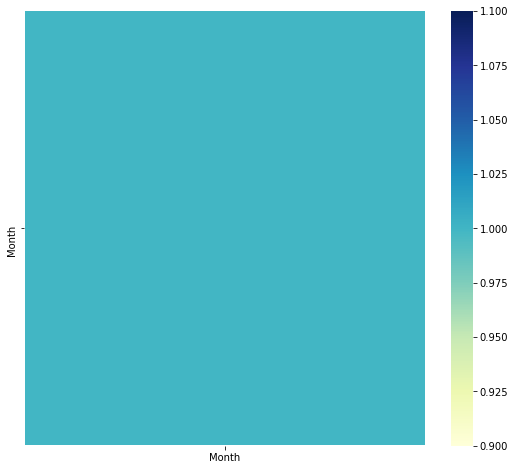

In [27]:
import seaborn as sns
df1=[['']]
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [ ]:
lin_reg_mod = LinearRegression()
print('#######')

In [ ]:
lin_reg_mod.fit(X_train, y_train)
print('%%%%%')

In [ ]:
pred = lin_reg_mod.predict(X_test)
print(pred)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

In [ ]:
print(test_set_rmse)
print(test_set_r2)

In [ ]:
%%bash
# pip install seaborn

In [ ]:
plt.scatter(X,y)
plt.plot(X, pred , color ='red')
plt.show()
